**implementing matropolis algorithm tensorflow and numpy in google Colab**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
tf.enable_v2_behavior()
import sys
import os

In [3]:
tfd = tfp.distributions
dtype = np.float32

Text(0, 0.5, 'probability')

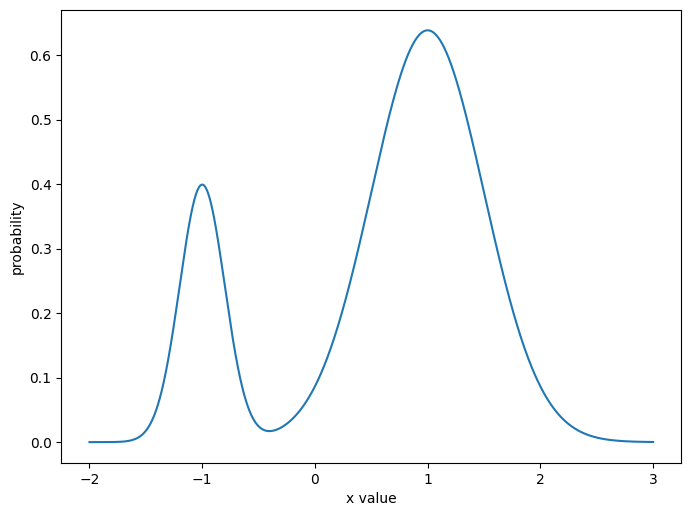

In [48]:
# making a gausian using the tf.distributions .mixture, nearly same as in the classroom example.
gausian = tfd.Mixture(
  cat=tfd.Categorical(probs=[0.2, 0.8]),
  components=[
    tfd.Normal(loc=0.0, scale=1.0),
    tfd.Normal(loc=6.0, scale=0.8),
])
x = tf.linspace(-2., 3., int(1e4))
plt.plot(x, bimix_gauss.prob(x))
plt.xlabel('x value')
plt.ylabel('probability')


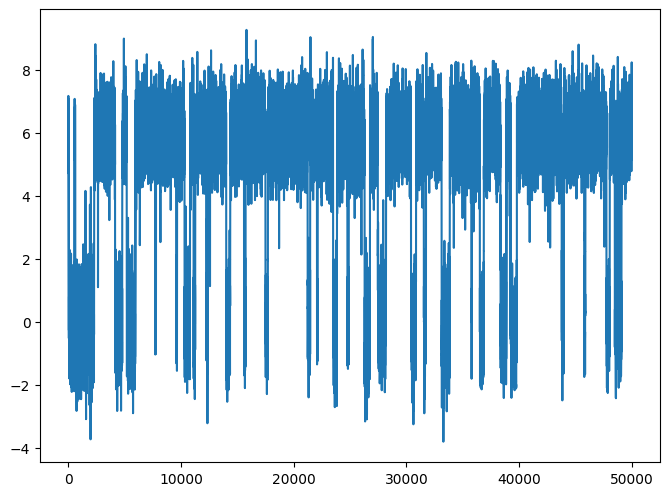

In [52]:
samples = tfp.mcmc.sample_chain(
  num_results=50000,
  current_state=dtype(1),
  kernel=tfp.mcmc.RandomWalkMetropolis(gausian.log_prob),
  num_burnin_steps=1000,
  trace_fn=None,
  seed=1)
# print(samples)
plt.plot(samples)

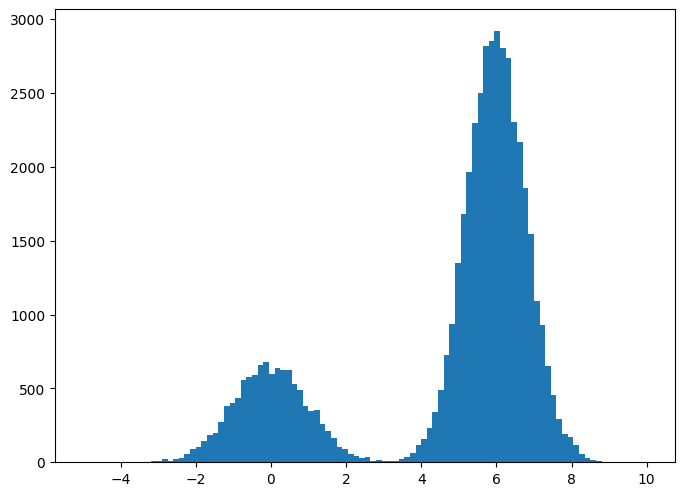

In [53]:
res = plt.hist( samples, bins=100, range=(-5,10) )
plt.show()



**Using Numpy**

(2000,)
1.0
0.0009225222267319076


Text(0, 0.5, 'probability')

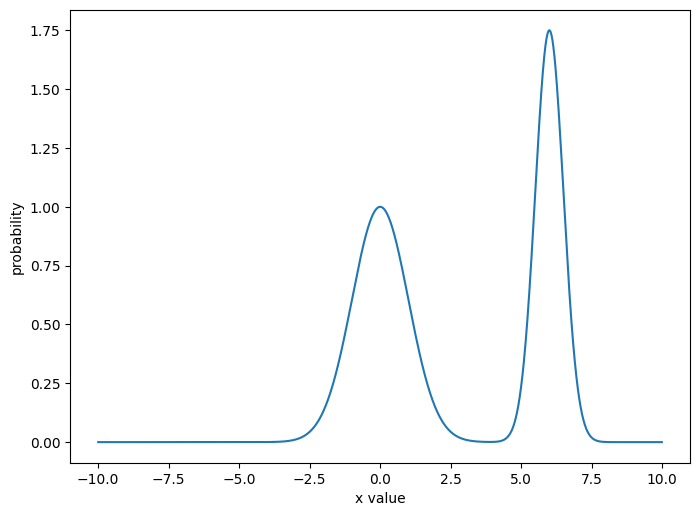

In [45]:
# now the numpy version of it.

sigma = [1.0, 0.5]
center = [0.0, 6.0]
def gausian(x, mu = center, sigma = sigma):
    return np.exp(-0.5*((x-mu[0])/sigma[0])**2) + 1.75* np.exp(-0.5*((x-mu[1])/sigma[1])**2) 
x_vals = np.arange(-10,10,.01)
g = gausian( x_vals, center, sigma )
print(g.shape)
gvalsi = []

plt.plot(x_vals,g)
print(gausian(0))
print(gausian(4))
plt.xlabel('x value')
plt.ylabel('probability')

In [42]:
N = 10000
samples = np.zeros(N+1)
samples[0] = 3
num_accept = 0

for i in range(N):
    #sample candidate from normal distribution
    candidate = np.random.normal(samples[i],4)
    
    #calculate probability of accepting this candidate
    prob = min(1, gausian(candidate) / gausian(samples[i]))
    
    #accept with the calculated probability
    if np.random.random() < prob:
        samples[i+1] = candidate
        num_accept += 1
        
    #otherwise report current sample again
    else:
        samples[i+1] = samples[i]

9980


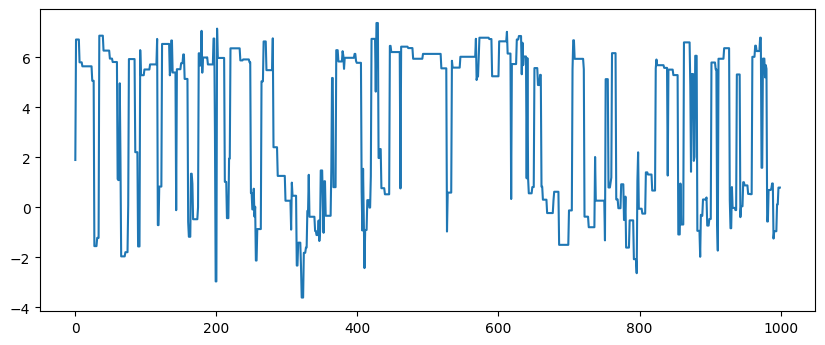

In [43]:
burn_in = 20
plt.figure(figsize=(10,4))
retained_samples = samples[burn_in+1:]
print(len(retained_samples))
plt.plot(retained_samples[:1000])

(-5.0, 10.0)

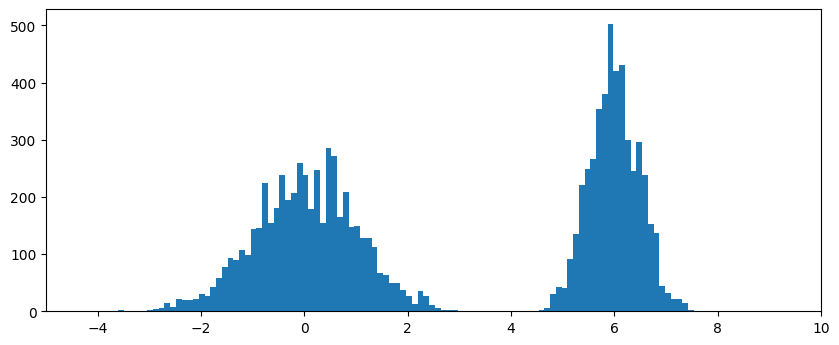

In [44]:
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins= 100)
plt.xlim(-5,10)